In [1]:
#import basic necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#import the Data set

df= pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
#Notes
#* This is a classification Problem, the Label is quality, and quality level counts need  to check
#* rest of the Features are contionuos in nature
df.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [4]:
#6 classifications, Lets ut a Quality benchmark
#Quality value>6 then the wine is of good quality, and the rest are not of good quality

In [5]:
#Lets take the shape of the dataset, and check if any null values 
df.shape

(1599, 12)

In [6]:
#Check the Null count
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
df.info()
#all the features as of Integer and float type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


C:\Users\sajad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='count'>

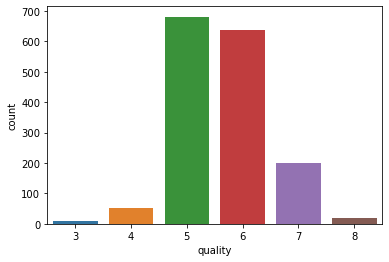

In [8]:
#Lets visualize the Label count
sns.countplot(df.quality)

its evident that quality values 5 and 6 are dominating 

In [9]:
#Now let change the quality value benchmark values like 
#if quality>=6 - value = 1 - Good Quality
#if quality<5 - value = 0, bad Quality - 0

df.quality=np.where(df.quality<6,0,1)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [10]:
df.value_counts(df.quality)

quality
1    855
0    744
dtype: int64

#count matches

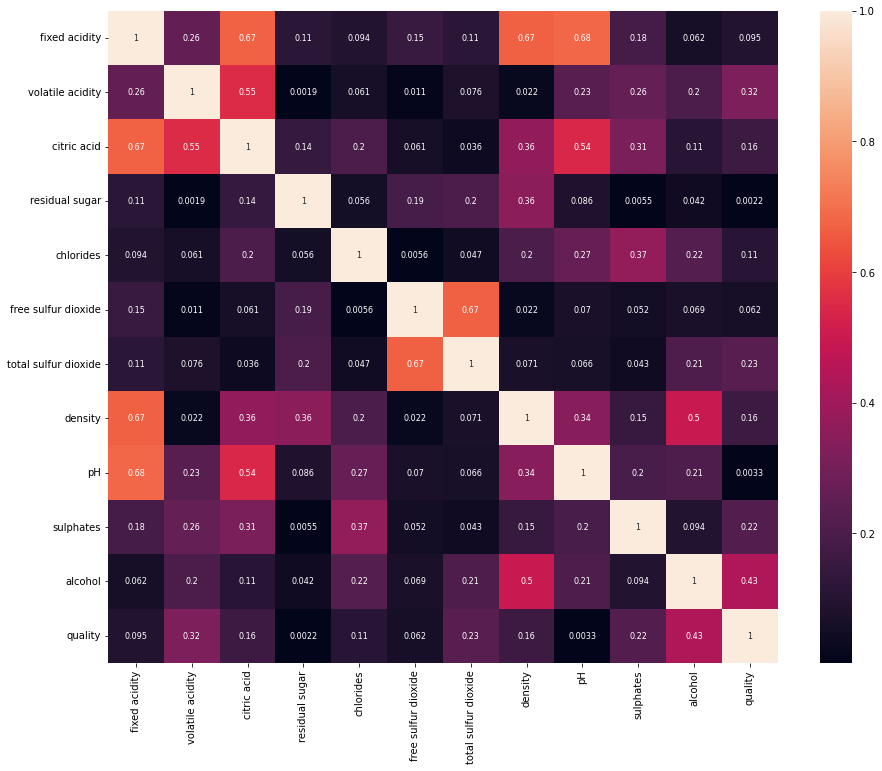

In [11]:
# Check for any correlation between feature to label or feature to features present or not
df_Corr=df.corr().abs()
plt.figure(figsize=(15,12))
sns.heatmap(df_Corr,annot=True,annot_kws={'size':8})
plt.show()

From the heat map, we can say that, no strong relationshop between feature to feature and also feature to labels
So can say no correlation and also no multicolliearity problem, However lets recheck and verify through some graphical analysis.
We can plot strip plots each feature with the labels

C:\Users\sajad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sajad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sajad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sajad\anacond

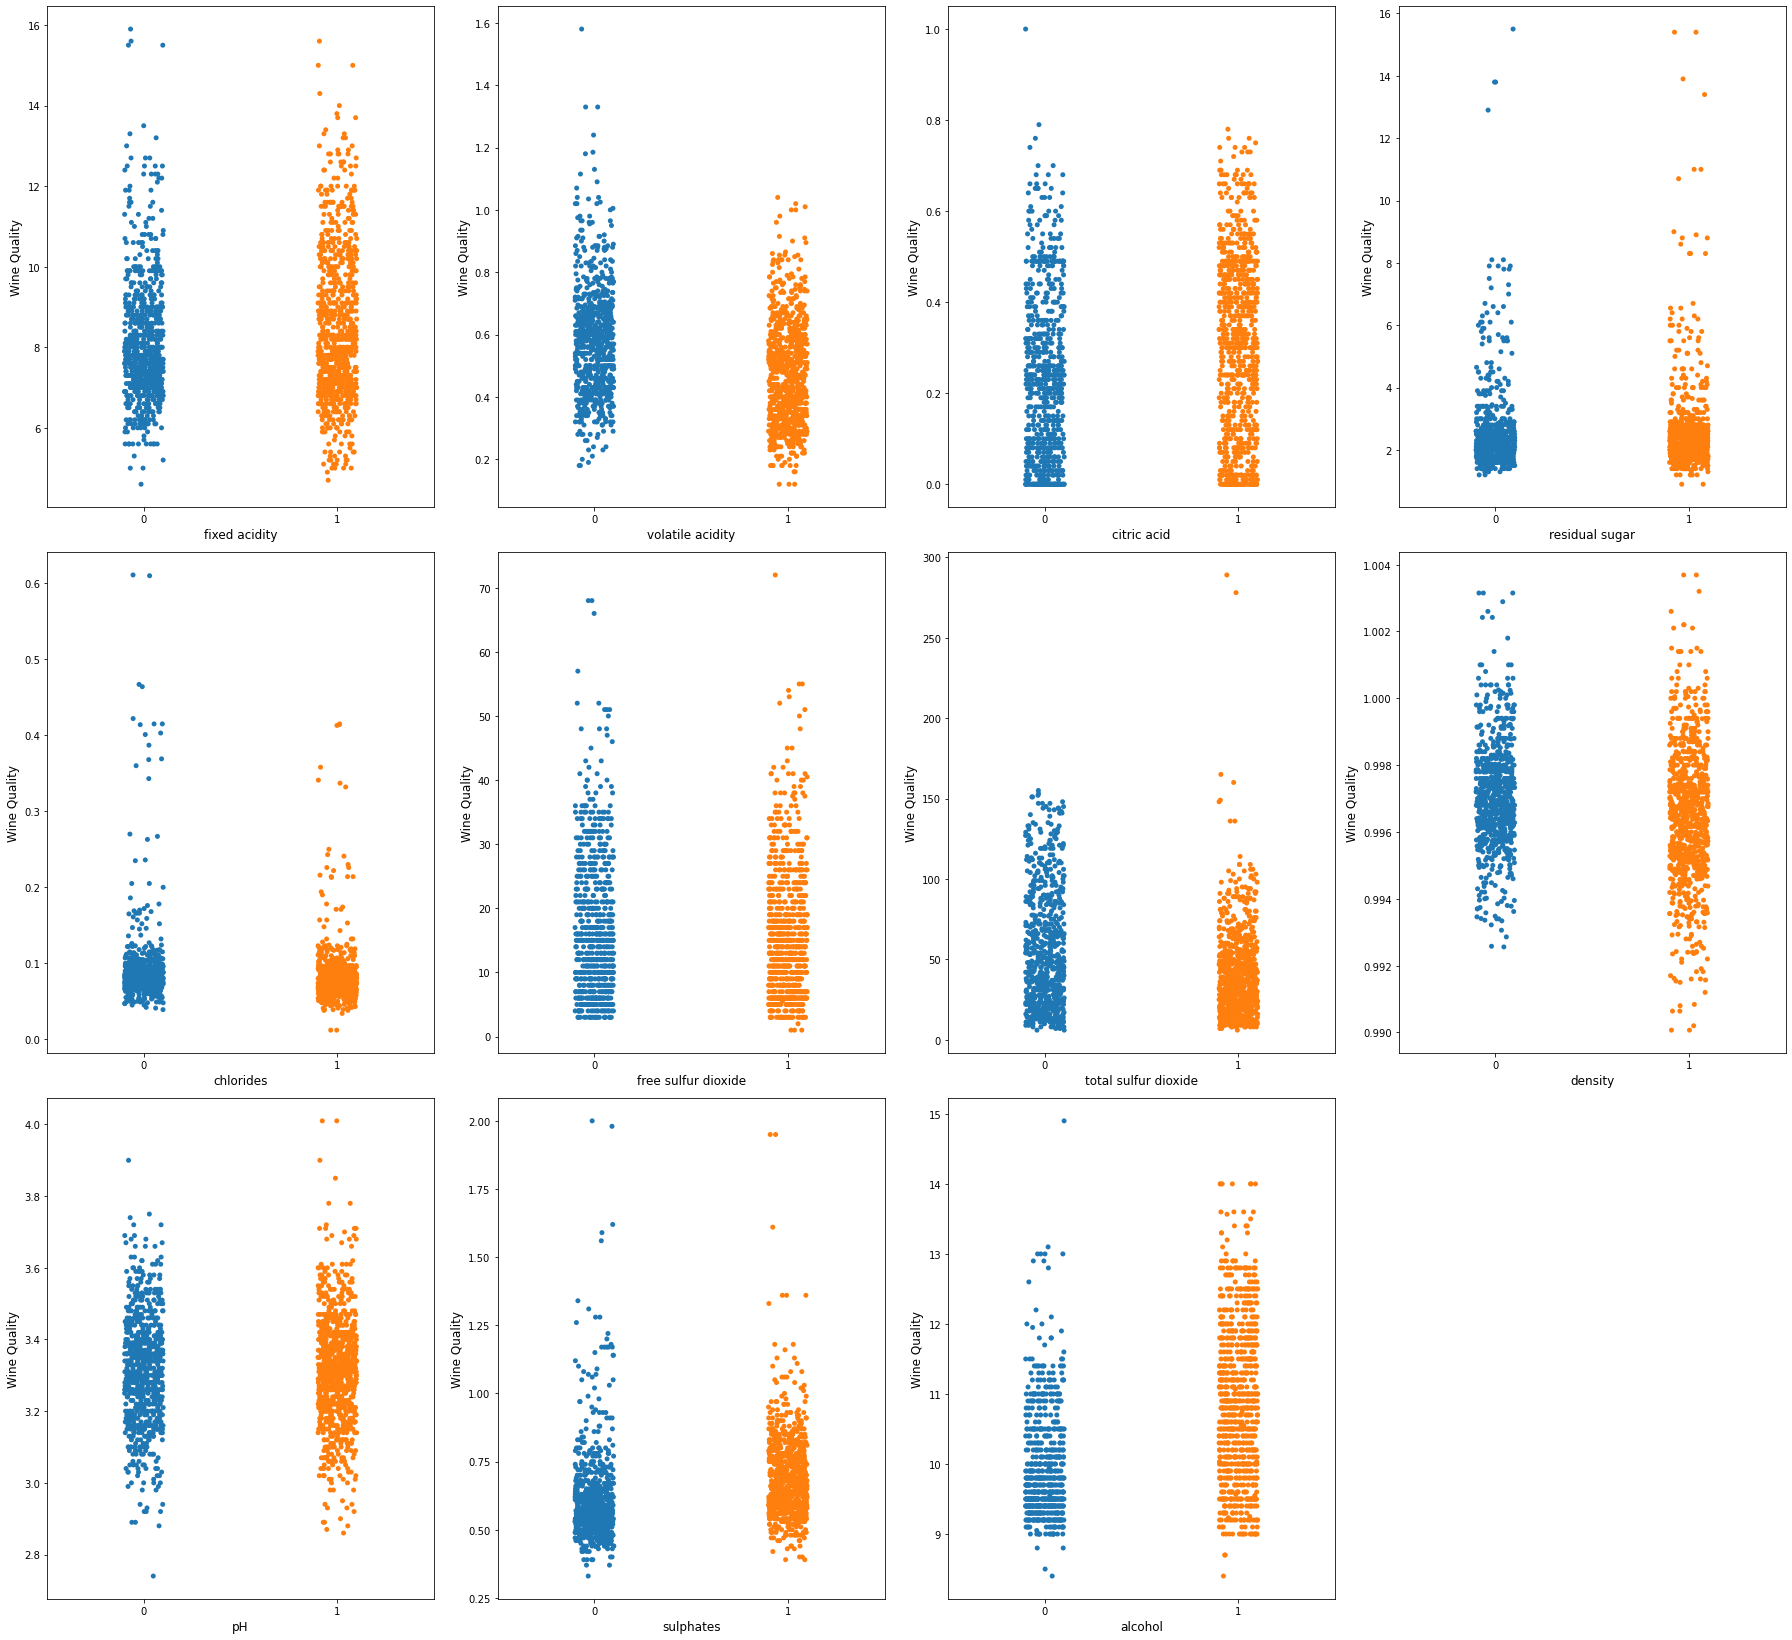

In [12]:
plt.figure(figsize=(25,30),facecolor='white')
pltNum=1
x=df.drop(columns='quality',axis=1)
y=df['quality']

for i in x:
    if pltNum<=12:
        plt.subplot(4,4,pltNum)
        sns.stripplot(y, x[i])
        plt.ylabel('Wine Quality',fontsize = 12)
        plt.xlabel(i, fontsize = 12)
    pltNum+=1
plt.tight_layout()
        

From the above graphs, I am unable to establish any +ve or negative trends other than features, volatile acidity and alcohol, volatile acidity has a negative relationship with outcome and alcohol has a positive relationship

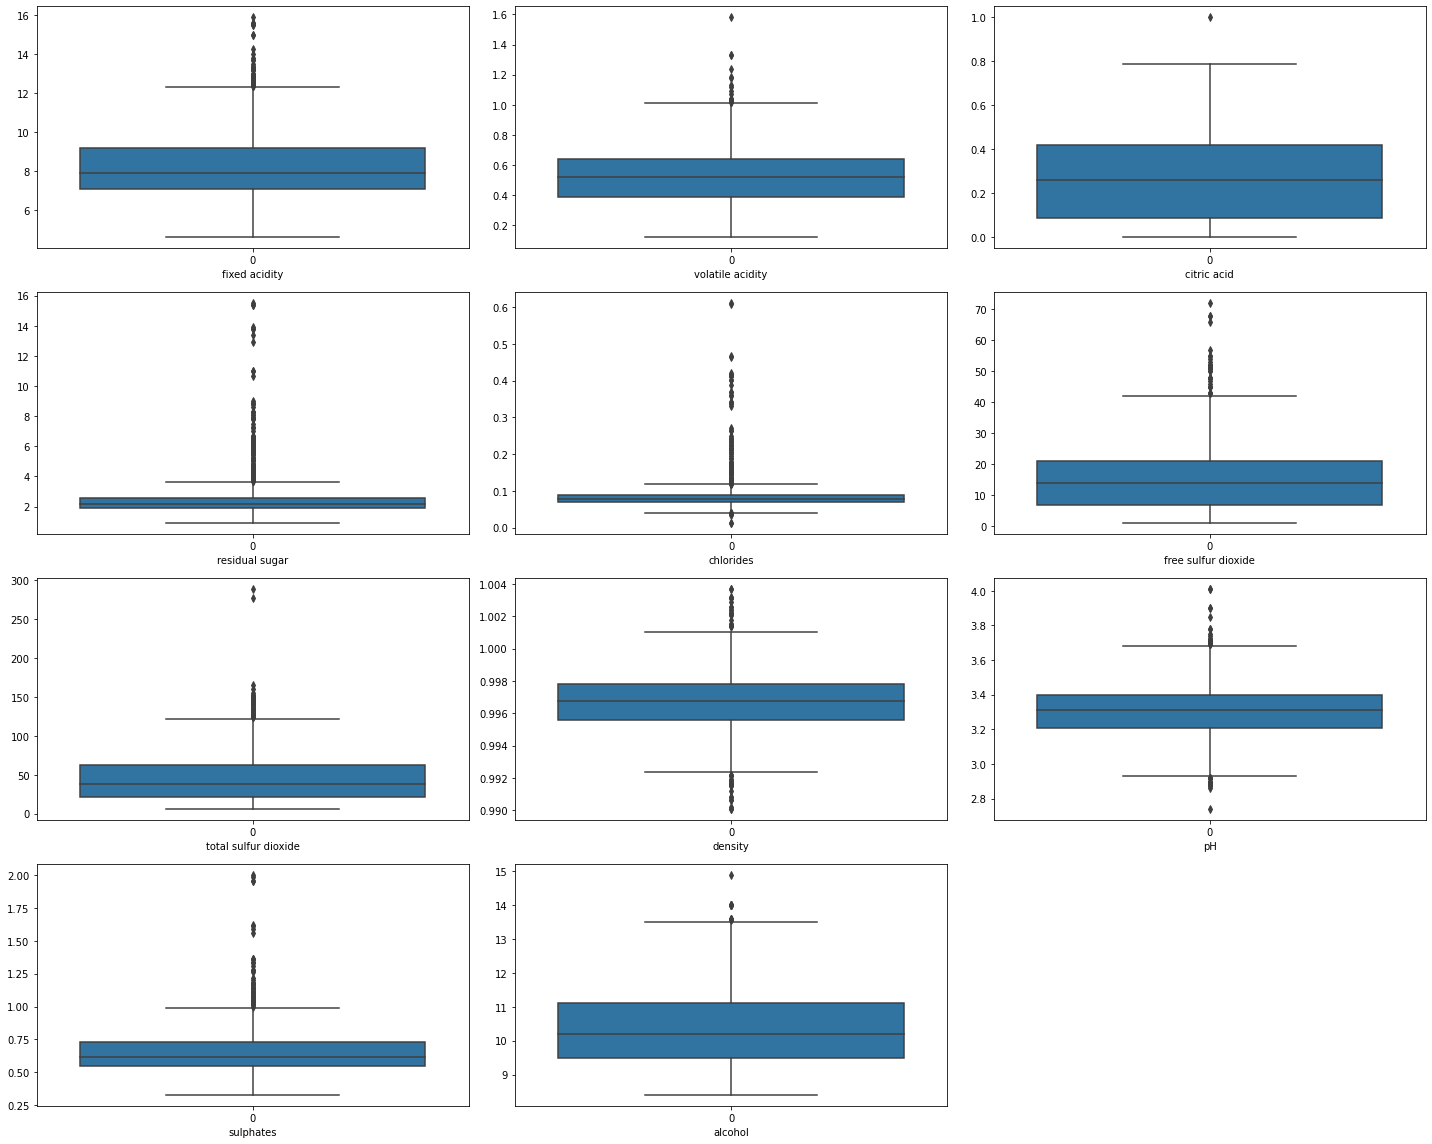

In [13]:
#next steps will be checking if any outlier present or not
#Lets plot box plot and check if outliers are present or how outliers can be treated
plt.figure(figsize=(20,16))
gp=1
for k in x:
    if gp<=11:
        plt.subplot(4,3,gp)
        sns.boxplot(data = x[k])
        plt.xlabel(k)
    gp+=1
plt.tight_layout()

Outliers are present for all the features, Next step will be how to treat the outliers.
Lets try and treat the outliers using Z score, Z score>3 is assumed 

In [14]:
from scipy.stats import zscore

zsc=np.abs(zscore(df))
zsc

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.528360,0.961877,1.391472,0.453218,0.243707,0.466193,0.379133,0.558274,1.288643,0.579207,0.960246,1.072004
1,0.298547,1.967442,1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,0.719933,0.128950,0.584777,1.072004
2,0.298547,1.297065,1.186070,0.169427,0.096353,0.083669,0.229047,0.134264,0.331177,0.048089,0.584777,1.072004
3,1.654856,1.384443,1.484154,0.453218,0.264960,0.107592,0.411500,0.664277,0.979104,0.461180,0.584777,0.932832
4,0.528360,0.961877,1.391472,0.453218,0.243707,0.466193,0.379133,0.558274,1.288643,0.579207,0.960246,1.072004
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,1.217796,0.403229,0.980669,0.382271,0.053845,1.542054,0.075043,0.978765,0.899886,0.461180,0.072294,1.072004
1595,1.390155,0.123905,0.877968,0.240375,0.541259,2.211469,0.137820,0.862162,1.353436,0.601055,0.729364,0.932832
1596,1.160343,0.099554,0.723916,0.169427,0.243707,1.255161,0.196679,0.533554,0.705508,0.542042,0.541630,0.932832
1597,1.390155,0.654620,0.775267,0.382271,0.264960,1.542054,0.075043,0.676657,1.677400,0.305990,0.209308,1.072004


In [17]:
filteres_Df=df[(zsc <3).all(axis=1)]
filteres_Df.reset_index()

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1
4,4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1454,1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1
1455,1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1
1456,1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


In [15]:
#Percentage data loss
print(((1599 -1458)/1599)*100)

8.818011257035648


In [18]:
filteres_Df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000
mean,8.312551,0.524050,0.265281,2.388717,0.081531,15.089849,43.660494,0.996718,3.316152,0.642414,10.417798,0.539781
std,1.647635,0.169451,0.191271,0.865307,0.021218,9.317669,29.414615,0.001718,0.141052,0.129753,1.021649,0.498586
min,5.000000,0.120000,0.000000,1.200000,0.038000,1.000000,6.000000,0.991500,2.880000,0.330000,8.400000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,21.000000,0.995600,3.220000,0.550000,9.500000,0.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,36.000000,0.996700,3.315000,0.620000,10.200000,1.000000
75%,9.200000,0.635000,0.420000,2.600000,0.089000,21.000000,58.000000,0.997800,3.400000,0.720000,11.100000,1.000000
max,13.500000,1.040000,0.790000,6.700000,0.226000,47.000000,145.000000,1.002200,3.750000,1.160000,13.600000,1.000000


C:\Users\sajad\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sajad\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sajad\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

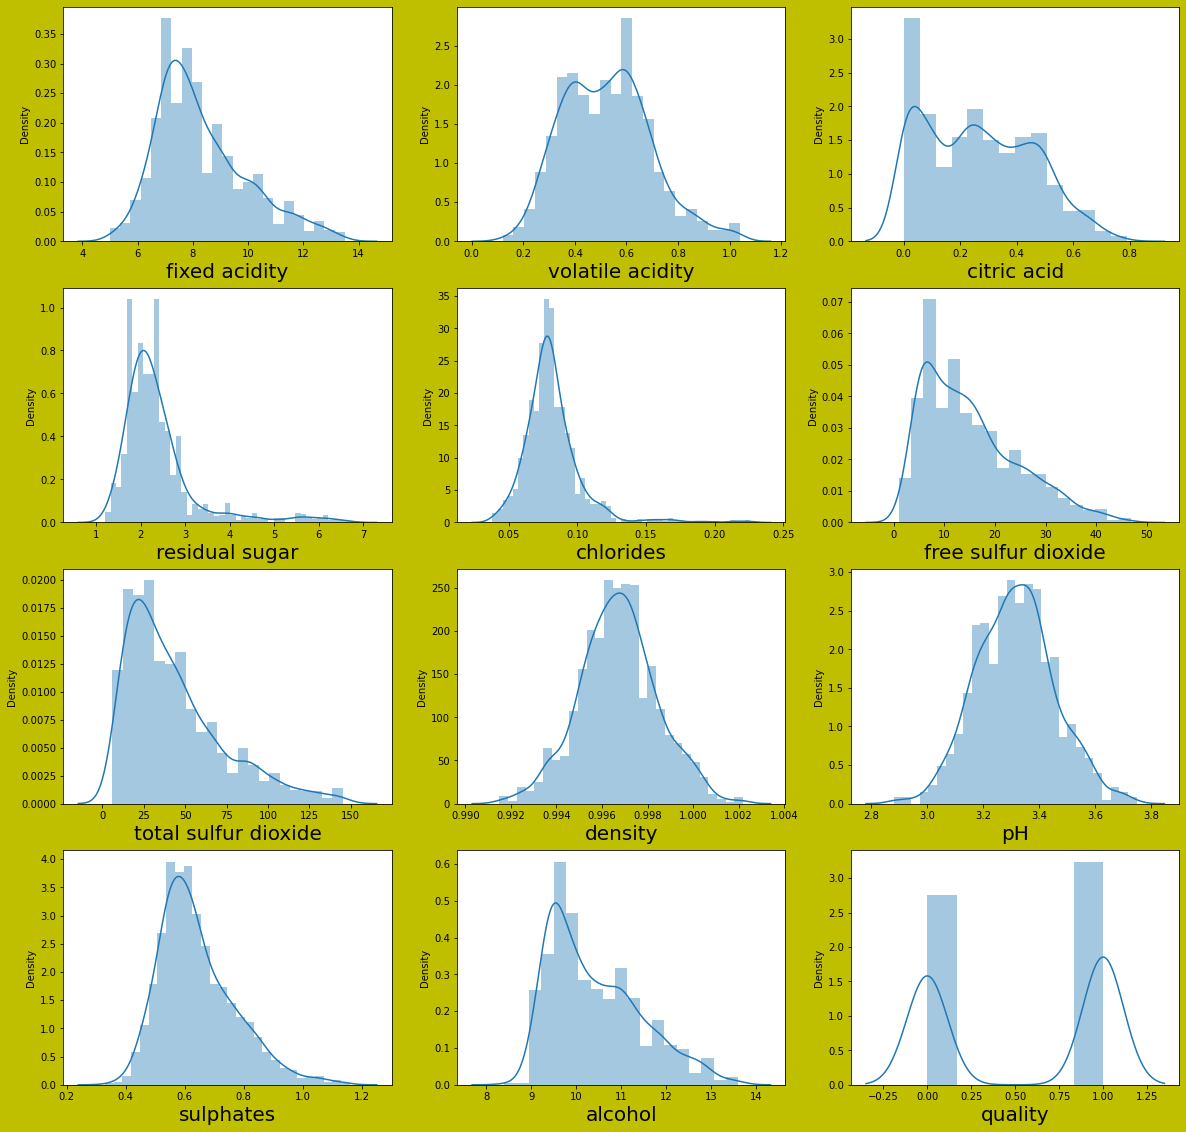

In [19]:
#Lets check the data skewness 

plt.figure(figsize=(20,25),facecolor='y')
plno=1
for i in filteres_Df:
    if plno<=12:
        ax=plt.subplot(5,3,plno)
        sns.distplot(filteres_Df[i])
        plt.xlabel(i,fontsize=20)
    plno+=1
plt.show()

outliers and skewness in the data are still observed

In [21]:
#Lets check the data skewness,split the dataframe in to x_= x features, y_=Labels
x_ = filteres_Df.drop(columns='quality',axis=1)
y_=filteres_Df['quality']
x_.shape
#y_.shape

(1458, 11)

In [22]:
x_.skew()

fixed acidity           0.820879
volatile acidity        0.392097
citric acid             0.292600
residual sugar          2.450707
chlorides               2.307274
free sulfur dioxide     0.869727
total sulfur dioxide    1.185230
density                 0.055543
pH                      0.113039
sulphates               0.893297
alcohol                 0.757396
dtype: float64

In [23]:
#Observing skewness in the fatures again, now lets try to reduce further by applying log transform
sk = ['fixed acidity','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','sulphates','alcohol']
x_log=x_[sk].copy()
x_log.head()

for j in x_log:
    x_log[j]=np.log(x_log[j])
x_log.skew()

fixed acidity           0.377100
residual sugar          1.229070
chlorides               0.528828
free sulfur dioxide    -0.300264
total sulfur dioxide   -0.095735
sulphates               0.345344
alcohol                 0.588835
dtype: float64

In [24]:
#Still some of the features are having skewness
#but stillskewness is present we can try applying power transform to reduce the skewness further

from sklearn.preprocessing import PowerTransformer
pw=PowerTransformer(method='yeo-johnson')
x_new=pw.fit_transform(x_)
x_new=pd.DataFrame(x_new,columns=x_.columns)
x_new.skew()

fixed acidity           0.019079
volatile acidity        0.005289
citric acid             0.018652
residual sugar         -0.003351
chlorides              -0.115179
free sulfur dioxide    -0.021273
total sulfur dioxide   -0.005751
density                -0.000989
pH                     -0.000062
sulphates               0.021132
alcohol                 0.108436
dtype: float64

Now the Skewness is reduced after applying power transfrom

In [25]:
x_new

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.469102,1.045775,-1.521870,-0.610050,-0.145674,-0.238196,-0.063312,0.635233,1.359954,-0.588230,-1.112329
1,-0.172127,1.902404,-1.521870,0.648011,0.981105,1.092232,0.954919,0.056291,-0.818421,0.453527,-0.526854
2,-0.172127,1.344815,-1.242790,0.207208,0.714585,0.241177,0.626959,0.172545,-0.382868,0.221989,-0.526854
3,1.571351,-1.559116,1.441794,-0.610050,-0.207728,0.442705,0.786687,0.750325,-1.112726,-0.391548,-0.526854
4,-0.469102,1.045775,-1.521870,-0.610050,-0.145674,-0.238196,-0.063312,0.635233,1.359954,-0.588230,-1.112329
...,...,...,...,...,...,...,...,...,...,...,...
1453,-1.556059,0.513269,-0.977605,-0.374385,0.619516,1.530345,0.319096,-1.059841,0.951840,-0.391548,0.287108
1454,-1.886311,0.229325,-0.849852,0.031636,-1.120823,1.893947,0.540682,-0.929512,1.427375,0.994340,0.901833
1455,-1.451955,-0.007166,-0.663895,0.207208,-0.145674,1.353559,0.177040,-0.563765,0.745438,0.932248,0.742840
1456,-1.886311,0.758466,-0.725146,-0.374385,-0.207728,1.530345,0.319096,-0.722762,1.761962,0.668613,-0.033205


C:\Users\sajad\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sajad\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sajad\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

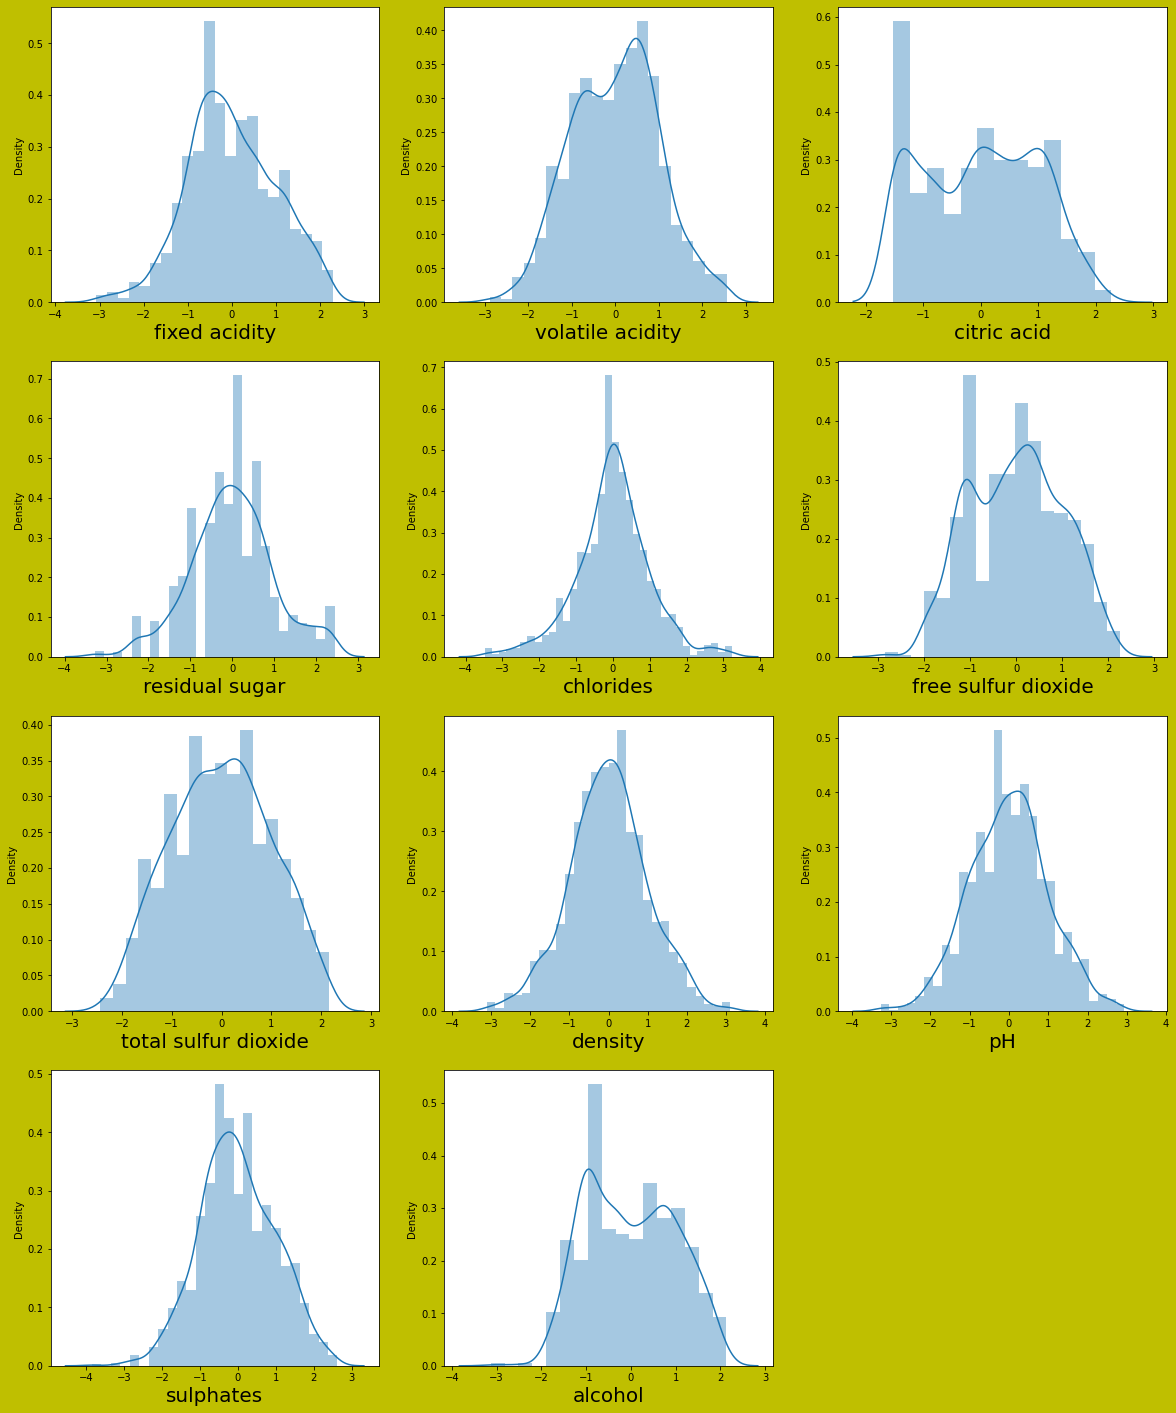

In [26]:
#Now lets visualize the skewness

plt.figure(figsize=(20,25),facecolor='y')
pltno=1
for i in x_new:
    if pltno<=11:
        ax=plt.subplot(4,3,pltno)
        sns.distplot(x_new[i])
        plt.xlabel(i,fontsize=20)
    pltno+=1
plt.show()

Skewness reduced now

In [27]:
#now we need to standardize the data using standard scaler

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_scaled=pd.DataFrame(sc.fit_transform(x_new),columns=x_new.columns)
x_scaled.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1.458000e+03,1.458000e+03,1.458000e+03,1.458000e+03,1.458000e+03,1.458000e+03,1.458000e+03,1.458000e+03,1.458000e+03,1.458000e+03,1.458000e+03
mean,9.672190e-16,-6.640017e-17,1.372169e-16,3.397678e-16,-1.421664e-16,6.228823e-17,-1.582525e-16,3.946698e-16,2.011803e-16,-3.106797e-17,4.271846e-17
std,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00
min,-3.073286e+00,-2.888503e+00,-1.521870e+00,-3.278735e+00,-3.468131e+00,-2.850168e+00,-2.431257e+00,-3.111116e+00,-3.267050e+00,-3.845289e+00,-3.135890e+00
25%,-7.109061e-01,-7.723135e-01,-9.133395e-01,-6.100499e-01,-5.346734e-01,-8.839401e-01,-7.606996e-01,-6.461543e-01,-6.724577e-01,-6.905348e-01,-9.562603e-01
50%,-1.020184e-01,5.276711e-02,1.918892e-02,3.163645e-02,3.417234e-02,1.642654e-02,2.094470e-02,-1.922956e-03,1.030266e-02,-2.759364e-02,-3.320546e-02
75%,6.852969e-01,7.047901e-01,8.505752e-01,6.480105e-01,5.707488e-01,7.932841e-01,7.351946e-01,6.352327e-01,6.069524e-01,7.369033e-01,8.238482e-01
max,2.290359e+00,2.573260e+00,2.274412e+00,2.437258e+00,3.232807e+00,2.247097e+00,2.157153e+00,3.114715e+00,2.933010e+00,2.627755e+00,2.136226e+00


In [28]:
#Random Forest Classifier checking
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,classification_report,plot_roc_curve

maxAcc = 0
maxRS = 0
rf = RandomForestClassifier()
for i in range(1,1000):
    x_train,x_test,y_train,y_test = train_test_split(x_scaled,y_,test_size = .30, random_state=i)
    
    rf.fit(x_train,y_train)
    pred = rf.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc>maxAcc:
        maxAcc = acc
        maxRs=i
print(f"Best Accuracy is: {maxAcc} on Random State: {maxRs}")




Best Accuracy is: 0.8515981735159818 on Random State: 262


In [29]:
l1= []
l2 =[]
l1.append('Random Forest')
l2.append(maxAcc)
l2

[0.8515981735159818]

In [30]:
#fit the data using the best random state

x_train,x_test,y_train,y_test =train_test_split(x_scaled,y_,test_size=0.30,random_state=262)


In [31]:
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84       192
           1       0.87      0.88      0.87       246

    accuracy                           0.86       438
   macro avg       0.86      0.86      0.86       438
weighted avg       0.86      0.86      0.86       438



In [32]:
print(confusion_matrix(y_test,pred))

[[159  33]
 [ 29 217]]


In [33]:
#import and see which model behaving good

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import GradientBoostingClassifier



In [34]:
#DT Algorithm check
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
pred=dt.predict(x_test)
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test,pred))

dt_acc= accuracy_score(y_test, pred)
l1.append('Decision Tree')
l2.append(dt_acc)

0.7625570776255708
[[140  52]
 [ 52 194]]
              precision    recall  f1-score   support

           0       0.73      0.73      0.73       192
           1       0.79      0.79      0.79       246

    accuracy                           0.76       438
   macro avg       0.76      0.76      0.76       438
weighted avg       0.76      0.76      0.76       438



In [35]:
#SVC
sv=SVC()
sv.fit(x_train,y_train)
pred=sv.predict(x_test)
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test,pred))
svc_acc= accuracy_score(y_test, pred)
l1.append('SVC')
l2.append(svc_acc)

0.8105022831050228
[[150  42]
 [ 41 205]]
              precision    recall  f1-score   support

           0       0.79      0.78      0.78       192
           1       0.83      0.83      0.83       246

    accuracy                           0.81       438
   macro avg       0.81      0.81      0.81       438
weighted avg       0.81      0.81      0.81       438



In [36]:
#KNN
knn=KNN()

In [37]:
knn.fit(x_train,y_train)
pred=knn.predict(x_test)
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test,pred))
knn_acc=accuracy_score(y_test, pred)
l1.append('KNN')
l2.append(knn_acc)

0.769406392694064
[[132  60]
 [ 41 205]]
              precision    recall  f1-score   support

           0       0.76      0.69      0.72       192
           1       0.77      0.83      0.80       246

    accuracy                           0.77       438
   macro avg       0.77      0.76      0.76       438
weighted avg       0.77      0.77      0.77       438



In [38]:
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
pred=gb.predict(x_test)
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test,pred))
gb_acc=accuracy_score(y_test, pred)
l1.append('Gradient Boosting')
l2.append(gb_acc)

0.815068493150685
[[148  44]
 [ 37 209]]
              precision    recall  f1-score   support

           0       0.80      0.77      0.79       192
           1       0.83      0.85      0.84       246

    accuracy                           0.82       438
   macro avg       0.81      0.81      0.81       438
weighted avg       0.81      0.82      0.81       438



In [41]:
final_acc_score = pd.DataFrame({'Algorithm':l1, 'Score':l2})
#final_acc_score.drop(final_acc_score.index[1:5],axis=0, inplace=True)
final_acc_score.reset_index

final_acc_score

,Algorithm,Score
0,Random Forest,0.851598
1,Decision Tree,0.762557
2,SVC,0.810502
3,KNN,0.769406
4,Gradient Boosting,0.815068


From the above chart, Random forest has good accuracy score and Decision Tree has least

In [42]:
# Now we will check Cross validation score
# Rain Forest Alogorithm
from sklearn.model_selection import cross_val_score
cvs=cross_val_score(rf,x_scaled,y_,cv=8).mean()
print ("Cross Validation score for Random Forest Algorithm=",cvs)

Cross Validation score for Random Forest Algorithm= 0.7147248243559718


In [43]:
cvs=cross_val_score(dt,x_scaled,y_,cv=8).mean()
print ("Cross Validation score for Decision Tree Algorithm=",cvs)

Cross Validation score for Decision Tree Algorithm= 0.6214270701975619


In [44]:
cvs=cross_val_score(sv,x_scaled,y_,cv=8).mean()
print ("Cross Validation score for Support Vector Machine ClassifierAlgorithm=",cvs)

Cross Validation score for Support Vector Machine ClassifierAlgorithm= 0.731167056986729


In [45]:
cvs=cross_val_score(knn,x_scaled,y_,cv=8).mean()
print ("Cross Validation score for KNearest Alogorithm=",cvs)

Cross Validation score for KNearest Alogorithm= 0.6797386356812587


In [46]:
cvs=cross_val_score(gb,x_scaled,y_,cv=8).mean()
print ("Cross Validation score for Gradient Boosting Algorithm=",cvs)

Cross Validation score for Gradient Boosting Algorithm= 0.7133624572149162


We are getting almost nearer Accuracy and cross validation score for the models
1. Random Forest	
2. SVC
3. Gradient Boost

can choose Randomforest model for fine tuning Gridsearch CV

In [47]:
rf=RandomForestClassifier()
from sklearn.model_selection import GridSearchCV
prams={ 'criterion':['gini','entropy'],
       'max_depth':[10,15,20],
        'max_features' : ["auto", "sqrt", "log2"]
    
        }
gcv=GridSearchCV(RandomForestClassifier(),prams,cv=5)


In [48]:
gcv.fit(x_train,y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 15, 20],
                         'max_features': ['auto', 'sqrt', 'log2']})

In [49]:
gcv.best_params_

{'criterion': 'entropy', 'max_depth': 15, 'max_features': 'auto'}

In [50]:
rt=RandomForestClassifier(criterion= 'entropy', max_depth= 15, max_features= 'auto')

In [51]:
rt.fit(x_train,y_train)
rt.predict(x_test)
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test,pred))

0.815068493150685
[[148  44]
 [ 37 209]]
              precision    recall  f1-score   support

           0       0.80      0.77      0.79       192
           1       0.83      0.85      0.84       246

    accuracy                           0.82       438
   macro avg       0.81      0.81      0.81       438
weighted avg       0.81      0.82      0.81       438



In [52]:
#Saving_model
import joblib
joblib.dump(rt,"WineQuality.pkl")

['WineQuality.pkl']